#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 3 (40 marks)**

##Submission Instruction
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A3_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [1]:
# Student ID: 

# Student name:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Background

Environment and its changes are the most complex system. It is unarguably accepted that the temperature changes are greately affected by various environmental factors. Many of them are positively related to the  change, whereas, some have negative correlation. In this assesment task, you will analyse relationship among various environmental factors, which affect temperature.

##The dataset

**Dataset file name:** weather_dataset.csv

**Dataset description:** The dataset contains total 10 features. Each row contains an hourly record of weather status and the data was recorded for the time period between 2006 and 2016.

**Features and labels:** 

1.   recording_date_time (date_time): Date and time the data was recorded
2.   precip_type (string): Precipitation status, blank (no value) indicates unknown status
3.   temperature (float): Temperature in degree Celsius
4.   apparent_temperature (float): Feel like temperature in degree Celsius
5.   humidity (float): Percentage amount of water vapour in the air 
6.   wind_speed (float): Speed of the wind in km per hour
7.   wind_bearing (int): The direction of wind in degree in geo-polar co-ordinate. Value 0 means perfect east, 90 means perfect north, 180 and 270 means west and south respectively.
8.   visibility (float): Distance in km that is visible in naked eyes.
9.   cloud_cover (float): The fraction of the sky obscured by clouds. The value is 1 if the observed area is fully cloudy, 0 if no clouds and other fractional value indicates the portion of the area covered by clouds.
10.   pressure (float): Air pressure or atmospheric in milibars


In [4]:
data = pd.read_csv('weather_dataset.csv')
data.head(10)
rows, cols = data.shape
print("Data has {} rows with  {} columns".format(rows, cols))
data.head()

Data has 96453 rows with  10 columns


,recording_date_time,precip_type,temperature,apparent_temperature,humidity,wind_speed,wind_bearing,visibility,cloud_cover,pressure
0,2006-04-01 00:00:00.000 +0200,rain,9.47,7.39,0.89,14.12,251,15.83,0,1015.13
1,2006-04-01 01:00:00.000 +0200,rain,9.36,7.23,0.86,14.26,259,15.83,0,1015.63
2,2006-04-01 02:00:00.000 +0200,rain,9.38,9.38,0.89,3.93,204,14.96,0,1015.94
3,2006-04-01 03:00:00.000 +0200,rain,8.29,5.94,0.83,14.10,269,15.83,0,1016.41
4,2006-04-01 04:00:00.000 +0200,rain,8.76,6.98,0.83,11.04,259,15.83,0,1016.51


##**Part 1: Linear Regression:**  **(25 marks)**


1.   Load the dataset and split the data for training and testing - consider the data of last 2 years (2015 and 2016) for testing. Now exclude recording_date_time column from both training and test sets. Display the shape of training and test sets. **(3 marks)**

In [5]:
#Check data type
print(type('recording_date_time'))
print(data.applymap(type))

#Change to string type
data['recording_date_time']= data['recording_date_time'].astype(str)
data['Year'] = data['recording_date_time'].str[:+4]

#remove cloud_cover
df = data.drop(['cloud_cover'],axis =1)
df.head(10)

#encode categorical attribute:precip_type
print(type('precip_type'))
df['precip_type']= data['precip_type'].astype('category')
df['precip_type'] = df['precip_type'].cat.codes

df['Year'] = df['Year'].astype(int)
training = df.loc[df['Year'] < 2015]
testing = df.loc[df['Year'] >= 2015]
train = training.drop(['Year','recording_date_time'], axis = 1)
test = testing.drop(['Year','recording_date_time'], axis =1 )
print(color.YELLOW + color.UNDERLINE + color.BOLD + 'TRAINTING DATA'+ color.END, train.shape)
print(train.head(5))
print(color.YELLOW + color.UNDERLINE + color.BOLD + 'TESTING DATA'+ color.END, test.shape)
print(test.head(5))

<class 'str'>
      recording_date_time    precip_type      temperature  \
0           <class 'str'>  <class 'str'>  <class 'float'>   
1           <class 'str'>  <class 'str'>  <class 'float'>   
2           <class 'str'>  <class 'str'>  <class 'float'>   
3           <class 'str'>  <class 'str'>  <class 'float'>   
4           <class 'str'>  <class 'str'>  <class 'float'>   
...                   ...            ...              ...   
96448       <class 'str'>  <class 'str'>  <class 'float'>   
96449       <class 'str'>  <class 'str'>  <class 'float'>   
96450       <class 'str'>  <class 'str'>  <class 'float'>   
96451       <class 'str'>  <class 'str'>  <class 'float'>   
96452       <class 'str'>  <class 'str'>  <class 'float'>   

      apparent_temperature         humidity       wind_speed   wind_bearing  \
0          <class 'float'>  <class 'float'>  <class 'float'>  <class 'int'>   
1          <class 'float'>  <class 'float'>  <class 'float'>  <class 'int'>   
2          <clas

2.  Consider the 'temperature' as the target. List the insignificant features for predicting temperature, if any. Explain your findings. **(5 marks)**
<br/><font color='green'>**[Hint for students: See the "7.3 Relevance and Covariance among features or variables" for more information.]** <font/>

In [6]:
dfnew = df.drop(['Year','recording_date_time'], axis = 1)
dfnew

,precip_type,temperature,apparent_temperature,humidity,wind_speed,wind_bearing,visibility,pressure
0,0,9.47,7.39,0.89,14.12,251,15.83,1015.13
1,0,9.36,7.23,0.86,14.26,259,15.83,1015.63
2,0,9.38,9.38,0.89,3.93,204,14.96,1015.94
3,0,8.29,5.94,0.83,14.10,269,15.83,1016.41
4,0,8.76,6.98,0.83,11.04,259,15.83,1016.51
...,...,...,...,...,...,...,...,...
96448,0,26.02,26.02,0.43,11.00,31,16.10,1014.36
96449,0,24.58,24.58,0.48,10.09,20,15.55,1015.16
96450,0,22.04,22.04,0.56,8.98,30,16.10,1015.66
96451,0,21.52,21.52,0.60,10.53,20,16.10,1015.95


CORRELATION MATRIX:


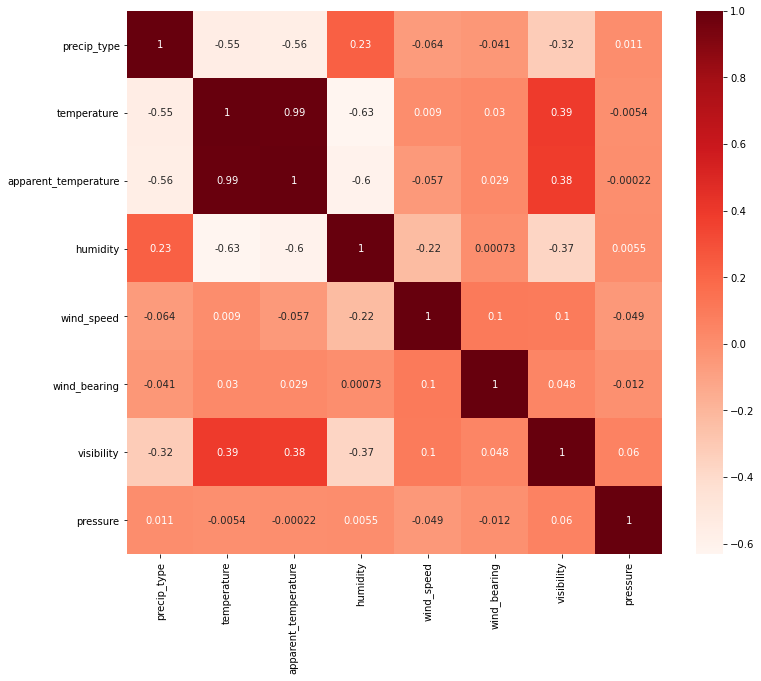

In [7]:
#Using Pearson Correlation
print(color.YELLOW + color.UNDERLINE + color.BOLD + 'CORRELATION MATRIX:' + color.END)
cor = dfnew.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
#Correlation with output variable
cor_target = abs(cor['temperature'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

precip_type             0.553872
temperature             1.000000
apparent_temperature    0.992628
humidity                0.632253
Name: temperature, dtype: float64

In [9]:
# One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. 
print(df[['apparent_temperature','humidity']].corr())
print(df[['apparent_temperature','precip_type']].corr())
print(df[['humidity','precip_type']].corr())

                      apparent_temperature  humidity
apparent_temperature               1.00000  -0.60257
humidity                          -0.60257   1.00000
                      apparent_temperature  precip_type
apparent_temperature              1.000000    -0.555889
precip_type                      -0.555889     1.000000
             humidity  precip_type
humidity     1.000000     0.228314
precip_type  0.228314     1.000000


In [10]:
# From the above code,
# the variables Apparent_temperature and Humidity are highly correlated with each other (-0.60257). 
# We will keep Apparent_temperature since its correlation with Temperature is higher than that of Humidity.
# After dropping Apparent_temperature, we are left with two feature, Apparent_temperature and Precip_type. 
# These are the final features given by Pearson correlation.

3.  Now create a linear model considering the 'temperature' as the target variable and other columns as features (you can optionally remove non-contributing features). Show the test performance (as Mean Absolute Error, MAE) of the model. **(5 marks)**

In [11]:
#X indicates predictors, Y indicates label target.
Xtrain0 = train.loc[:,('apparent_temperature','precip_type','humidity')]
Ytrain0 = train['temperature'] 
print(color.BOLD + color.UNDERLINE + color.YELLOW + 'Xtrain' + color.END, Xtrain0.shape, Xtrain0.head(5))
print(color.BOLD + color.UNDERLINE + color.YELLOW + 'Ytrain' + color.END, Ytrain0.shape, Ytrain0.head(5))

Xtest0 = test.loc[:,('apparent_temperature','precip_type','humidity')]
Ytest0 = test['temperature']
print(color.BOLD + color.UNDERLINE + color.YELLOW + 'Xtest' + color.END, Xtest0.shape, Xtest0.head(5))
print(color.BOLD + color.UNDERLINE + color.YELLOW + 'Ytest' + color.END, Ytest0.shape, Ytest0.head(5))

Xtrain (78909, 3)    apparent_temperature  precip_type  humidity
0                  7.39            0      0.89
1                  7.23            0      0.86
2                  9.38            0      0.89
3                  5.94            0      0.83
4                  6.98            0      0.83
Ytrain (78909,) 0    9.47
1    9.36
2    9.38
3    8.29
4    8.76
Name: temperature, dtype: float64
Xtest (17544, 3)        apparent_temperature  precip_type  humidity
78909                 11.02            0      0.71
78910                 10.99            0      0.62
78911                  7.02            0      0.64
78912                  6.56            0      0.67
78913                  5.61            0      0.67
Ytest (17544,) 78909    11.02
78910    10.99
78911     9.87
78912     8.84
78913     8.31
Name: temperature, dtype: float64


In [12]:
from sklearn.linear_model import LinearRegression
LINEAR = LinearRegression(normalize=True)

#fit the model using our data
LINEAR.fit(Xtrain0, Ytrain0)
#Now that we have built our model, lets see how it performs with our test dataset
Ypred0 = LINEAR.predict(Xtest0)

print(color.BOLD + color.UNDERLINE + color.RED + "THE PREDICTED TEMPERATURE"+ color.END)
print(Ypred0)
print(color.BOLD + color.UNDERLINE + color.RED +"THE TRUE TEMPERATURE"+ color.END)
print(Ytest0)

#Test performance:Mean Squared Error 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(Ytest0,Ypred0) 
print(color.BOLD + color.RED + 'The Mean Square Error is'+ color.END, MSE )
#Test performance:Mean Absolute Error 
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(Ytest0,Ypred0) 
print(color.BOLD + color.RED + 'The Mean Absolute Error is'+ color.END,MAE)

THE PREDICTED TEMPERATURE
[12.17595369 12.40167295  8.97408719 ... 21.95402296 21.40073753
 20.45557092]
THE TRUE TEMPERATURE
78909    11.02
78910    10.99
78911     9.87
78912     8.84
78913     8.31
         ...  
96448    26.02
96449    24.58
96450    22.04
96451    21.52
96452    20.44
Name: temperature, Length: 17544, dtype: float64
The Mean Square Error is 0.9453236601477598
The Mean Absolute Error is 0.7635283567084327


4.   Find the feature which shows maximum correlation with "pressure". Create a linear regression model to predict temperature using these two features ('pressure' and the one which shows maximum correlation). Compare the performance of this simplified model with the model developed in the previous question (Q-3). Explain the performance variation, if any. **(6 marks)**

In [13]:
#Correlation with Pressure 
cor_target1 = abs(cor['pressure'])
#Selecting the highest correlated feature
relevant_features1 = cor_target1.sort_values(ascending=False)
relevant_features1
print (color.BOLD + color.YELLOW +'The two features used for linear regression model are'+ color.END)
print(relevant_features1.head(2))

The two features used for linear regression model are
pressure      1.000000
visibility    0.059826
Name: pressure, dtype: float64


In [14]:
#X indicates predictors, Y indicates label target.
Xtrain1 = train.loc[:,('pressure','visibility')]
Ytrain1 = train['temperature'] 
print(color.BOLD + color.UNDERLINE + color.YELLOW + 'Xtrain' + color.END, Xtrain1.shape, Xtrain1.head(5))
print(color.BOLD + color.UNDERLINE + color.YELLOW + 'Ytrain' + color.END, Ytrain1.shape, Ytrain1.head(5))

Xtest1 = test.loc[:,('pressure','visibility')]
Ytest1 = test['temperature']
print(color.BOLD + color.UNDERLINE + color.YELLOW + 'Xtest' + color.END, Xtest1.shape, Xtest1.head(5))
print(color.BOLD + color.UNDERLINE + color.YELLOW + 'Ytest' + color.END, Ytest1.shape, Ytest1.head(5))

Xtrain (78909, 2)    pressure  visibility
0   1015.13       15.83
1   1015.63       15.83
2   1015.94       14.96
3   1016.41       15.83
4   1016.51       15.83
Ytrain (78909,) 0    9.47
1    9.36
2    9.38
3    8.29
4    8.76
Name: temperature, dtype: float64
Xtest (17544, 2)        pressure  visibility
78909   1004.56       10.26
78910   1005.28       10.26
78911   1006.28       14.39
78912   1006.34       15.18
78913   1007.65       15.18
Ytest (17544,) 78909    11.02
78910    10.99
78911     9.87
78912     8.84
78913     8.31
Name: temperature, dtype: float64


In [15]:
from sklearn.linear_model import LinearRegression
LINEAR = LinearRegression(normalize=True)

#fit the model using our data
LINEAR.fit(Xtrain1, Ytrain1)
#Now that we have built our model, lets see how it performs with our test dataset
Ypred1 = LINEAR.predict(Xtest1)

print(color.BOLD + color.UNDERLINE + color.RED + "THE PREDICTED TEMPERATURE"+ color.END)
print(Ypred1)
print(color.BOLD + color.UNDERLINE + color.RED +"THE TRUE TEMPERATURE"+ color.END)
print(Ytest1)

#Test performance:Mean Squared Error 
from sklearn.metrics import mean_squared_error
MSE1 = mean_squared_error(Ytest1,Ypred1) 
print(color.BOLD + color.RED + 'The Mean Square Error of using Pressure and Visibility attributes is'+ color.END, MSE1 )
#Test performance:Mean Absolute Error 
from sklearn.metrics import mean_absolute_error
MAE1 = mean_absolute_error(Ytest1,Ypred1) 
print(color.BOLD + color.RED + 'The Mean Absolute Error of using Pressure and Visibility attributes is'+ color.END, MAE1)

THE PREDICTED TEMPERATURE
[11.94574457 11.94406162 15.62928099 ... 17.13416513 17.13348728
 16.6151313 ]
THE TRUE TEMPERATURE
78909    11.02
78910    10.99
78911     9.87
78912     8.84
78913     8.31
         ...  
96448    26.02
96449    24.58
96450    22.04
96451    21.52
96452    20.44
Name: temperature, Length: 17544, dtype: float64
The Mean Square Error of using Pressure and Visibility attributes is 64.7674290984127
The Mean Absolute Error of using Pressure and Visibility attributes is 6.498840791843139


In [37]:
print("Compare the performance of this simplified model with the model developed in the previous question (Q-3),The Mean Square Error (MSE) and the Mean Absolute Error (MAE) from the model using Pressure and Visibility attributes are significantly higher than the MSE and MAE from the model in question 3, which indicates lesser accuracy.")

Compare the performance of this simplified model with the model developed in the previous question (Q-3),The Mean Square Error (MSE) and the Mean Absolute Error (MAE) from the model using Pressure and Visibility attributes are significantly higher than the MSE and MAE from the model in question 3.


5. Apportion the complete dataset into training and test sets, with an 40-60 split. **(6 marks)**

  (a)  Train a linear regression model without considering overfitting scenario and report the test performance. 
  
  (b) Create an optimal regularised linear regression model and report the test performance.
  
  (c) Explain the reason behind the performance variation, if any.


In [16]:
#Split data
train2, test2 = np.split(dfnew, [int(.4*len(dfnew))])
print(color.BOLD + color.UNDERLINE + color.YELLOW + 'training data' + color.END, train2.shape)
print(train2.head(5))
print(color.BOLD + color.UNDERLINE + color.YELLOW + 'testing data' + color.END, test2.shape)
print(test2.head(5))


training data (38581, 8)
   precip_type  temperature  apparent_temperature  humidity  wind_speed  \
0            0         9.47                  7.39      0.89       14.12   
1            0         9.36                  7.23      0.86       14.26   
2            0         9.38                  9.38      0.89        3.93   
3            0         8.29                  5.94      0.83       14.10   
4            0         8.76                  6.98      0.83       11.04   

   wind_bearing  visibility  pressure  
0           251       15.83   1015.13  
1           259       15.83   1015.63  
2           204       14.96   1015.94  
3           269       15.83   1016.41  
4           259       15.83   1016.51  
testing data (57872, 8)
       precip_type  temperature  apparent_temperature  humidity  wind_speed  \
38581            1        -2.73                 -6.89      0.73       11.21   
38582            1        -3.76                 -8.47      0.78       12.56   
38583            1     

In [17]:
#X indicates predictors, Y indicates label target.
Xtrain2 = train2.drop(['temperature'],axis=1)
Ytrain2 = train2['temperature'] 
print(color.BOLD + color.UNDERLINE + color.YELLOW + 'Xtrain2' + color.END, Xtrain2.shape, Xtrain2.head(5))
print(color.BOLD + color.UNDERLINE + color.YELLOW + 'Ytrain2' + color.END, Ytrain2.shape, Ytrain2.head(5))

Xtest2 = test2.drop(['temperature'],axis=1)
Ytest2 = test2['temperature']
print(color.BOLD + color.UNDERLINE + color.YELLOW + 'Xtest2' + color.END, Xtest2.shape, Xtest2.head(5))
print(color.BOLD + color.UNDERLINE + color.YELLOW + 'Ytest2' + color.END, Ytest2.shape, Ytest2.head(5))

Xtrain2 (38581, 7)    precip_type  apparent_temperature  humidity  wind_speed  wind_bearing  \
0            0                  7.39      0.89       14.12           251   
1            0                  7.23      0.86       14.26           259   
2            0                  9.38      0.89        3.93           204   
3            0                  5.94      0.83       14.10           269   
4            0                  6.98      0.83       11.04           259   

   visibility  pressure  
0       15.83   1015.13  
1       15.83   1015.63  
2       14.96   1015.94  
3       15.83   1016.41  
4       15.83   1016.51  
Ytrain2 (38581,) 0    9.47
1    9.36
2    9.38
3    8.29
4    8.76
Name: temperature, dtype: float64
Xtest2 (57872, 7)        precip_type  apparent_temperature  humidity  wind_speed  wind_bearing  \
38581            1                 -6.89      0.73       11.21           155   
38582            1                 -8.47      0.78       12.56           130   
38583    

In [18]:
####(a) Train Linear Regression model ###
from sklearn.linear_model import LinearRegression
LINEAR = LinearRegression(normalize=True)

#fit the model using our data
LINEAR.fit(Xtrain2, Ytrain2)
#Now that we have built our model, lets see how it performs with our test dataset
Ypred2 = LINEAR.predict(Xtest2)

print(color.BOLD + color.UNDERLINE + color.RED + "THE PREDICTED TEMPERATURE"+ color.END)
print(Ypred2)
print(color.BOLD + color.UNDERLINE + color.RED +"THE TRUE TEMPERATURE"+ color.END)
print(Ytest2)

#Test performance:Mean Squared Error 
from sklearn.metrics import mean_squared_error
MSE2 = mean_squared_error(Ytest2,Ypred2) 
print(color.BOLD + color.RED + 'The Mean Square Error is'+ color.END, MSE2 )
#Test performance:Mean Absolute Error 
from sklearn.metrics import mean_absolute_error
MAE2 = mean_absolute_error(Ytest2,Ypred2) 
print(color.BOLD + color.RED + 'The Mean Absolute Error is'+ color.END, MAE2)

THE PREDICTED TEMPERATURE
[-3.48180484 -4.82031042 -4.9353084  ... 21.82082427 21.44603359
 20.07335702]
THE TRUE TEMPERATURE
38581    -2.73
38582    -3.76
38583    -3.83
38584    -4.83
38585    -5.01
         ...  
96448    26.02
96449    24.58
96450    22.04
96451    21.52
96452    20.44
Name: temperature, Length: 57872, dtype: float64
The Mean Square Error is 0.8852065269363524
The Mean Absolute Error is 0.7331198184145021


In [33]:
####(b) Optimal regularised linear regression model###

##RIDGE###
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alphaLR = [.001,.003,.01,.03,1,3,5,10,30]

ridgeLR = Ridge(normalize=True)

parameters = {'alpha': [.001,.003,.01,.03,1,3,5,10,30]}

ridgeopt= GridSearchCV(ridgeLR, parameters, scoring='neg_mean_absolute_error', cv=10)

ridgeopt.fit(Xtrain2, Ytrain2)

print(color.YELLOW + "The parameter that gave the best results is"+ color.END, ridgeopt.best_params_)
print(color.YELLOW + "The best estimator that was chosen:"+ color.END, ridgeopt.best_estimator_)
print(color.YELLOW + "The  Mean Absolute Error after run cross-validation is:"+ color.END,-ridgeopt.best_score_)

# Returns the score on the given data, if the estimator has been refit.
#This uses the score defined by 'scoring' where provided, and the 'best_estimator_.score' method otherwise
#Similar to honest testing
print(color.BOLD + color.RED + "The Mean Absolute for honest testing is:"+ color.END, -ridgeopt.score(Xtest2, Ytest2))

The parameter that gave the best results is {'alpha': 0.001}
The best estimator that was chosen: Ridge(alpha=0.001, normalize=True)
The  Mean Absolute Error after run cross-validation is: 0.7618672738280382
The Mean Absolute for honest testing is: 0.7330325257284986


In [34]:
###lASSO###
from sklearn.linear_model import Lasso

alphaLR = [1e-10, 1e-5, 1e-3, .001, .01, 1]

lassoLR = Lasso(normalize=True, max_iter=1e5)

parameters1 = {'alpha': [1e-10, 1e-5, 1e-3, .001, .01, 1]}

lassoopt = GridSearchCV(lassoLR, parameters1, scoring='neg_mean_squared_error', cv = 10)

lassoopt.fit(Xtrain2, Ytrain2)
print(color.YELLOW + "The parameter that gave the best results is"+ color.END, lassoopt.best_params_)
print(color.YELLOW + "The best estimator that was chosen"+ color.END, lassoopt.best_estimator_)
print(color.YELLOW + "The  Mean Absolute Error after run cross-validation is" + color.END, -lassoopt.best_score_)

# Returns the score on the given data, if the estimator has been refit.
#This uses the score defined by 'scoring' where provided, and the 'best_estimator_.score' method otherwise
#Similar to honest testing
print(color.BOLD + color.RED +  "The Mean Absolute Error honest testing is:"+ color.END, -lassoopt.score(Xtest2, Ytest2))

The parameter that gave the best results is {'alpha': 1e-05}
The best estimator that was chosen Lasso(alpha=1e-05, max_iter=100000.0, normalize=True)
The  Mean Absolute Error after run cross-validation is 0.9637888655571556
The Mean Absolute Error honest testing is: 0.8850614831311039


In [35]:
###(c)####
print("The Mean Absoute Error after runing cross-validation applied by Ridge is lower applied by Lasso (0.7618672738280382 < 0.9637888655571556)")
print("The Mean Absoute Error for honest testing applied by Ridge is lower using applied by Lasso (0.7330325257284986 < 0.8850614831311039)")
print("The performance of predicted values applied by Ridge Regression is more accurated than the performance of predicted values applied by Lasso Regression")

The Mean Absoute Error after runing cross-validation applied by Ridge is lower applied by Lasso (0.7618672738280382 < 0.9637888655571556)
The Mean Absoute Error for honest testing applied by Ridge is lower using applied by Lasso (0.7330325257284986 < 0.8850614831311039)


##**Part 2: Logistic Regression:**  **(9 marks)**


1.  Can the same target (temperature, mentioned in Part-1) be used for logistic regression? Why? **(2 marks)**

No, because logistic regrgession is used to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. Whereas, Temperature attribute is a numerical variable with a wide range of values.

2.  Split the dataset as 70-30% for training and testing. Create a logistic regression model to predict the 'precip_type'. Report the prediction accuracy of your model whether the "precip_type" is "rain" or not (use decision threshold of 0.45). **(5 marks)**



In [21]:
trainLR,testLR = train_test_split(dfnew, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#X indicates predictors, Y indicates label target.
XtrainLR = trainLR.drop(['precip_type'],axis=1)
YtrainLR = trainLR['precip_type'] 

XtestLR = testLR.drop(['precip_type'],axis=1)
YtestLR = testLR['precip_type']

In [22]:
# Create regularization hyperparameter space
lambda_val =[.0001,.0003,.001,.003,.01,.03,.1,.3,1,3,5,10]
C = [1/x for x in lambda_val]

# Create hyperparameter options
hyperparameters = dict(C=C)

In [23]:
# Lasso
lgL = LogisticRegression(class_weight ='balanced', random_state=0, solver='liblinear', penalty = 'l1')

lg_optL = GridSearchCV(lgL, hyperparameters, scoring='accuracy',cv=5)

lg_optL.fit(XtrainLR,YtrainLR)

print( "The parameter that gave the best results for L1 is", lg_optL.best_params_)
print( "The accuracy is" , lg_optL.score(XtestLR,YtestLR))
print("The parameter that gave the best results for L1 is {'C': 3.3333333333333335} and The accuracy is 0.9169200995299972")

The parameter that gave the best results for L1 is {'C': 3.3333333333333335}
The accuracy is 0.9169200995299972


In [24]:
# Ridge
lgR = LogisticRegression(class_weight ='balanced', random_state=0, solver='liblinear', penalty = 'l2')

lg_optR = GridSearchCV(lgR, hyperparameters, scoring='accuracy',cv=5)

lg_optR.fit(XtrainLR,YtrainLR)

print( "The parameter that gave the best results is for L2", lg_optR.best_params_)
print("The accuracy is" , lg_optR.score(XtestLR,YtestLR))
Print ("The parameter that gave the best results is for L2 {'C': 10.0} and The accuracy is 0.9168855405031794")

The parameter that gave the best results is for L2 {'C': 10.0}
The accuracy is 0.9168855405031794


In [30]:
#The accuracy using Lasso is higher than the accuracy using Ridge (0.9169200995299972 > 0.9168855405031794) so we apply Lasso in our prediction model.
#Initialize the Logitic regression model with l2 penalty
##ridge
THRESHOLD = 0.45
LR = LogisticRegression(C=3.3333333333333335, penalty='l1', class_weight='balanced', random_state=0, solver='liblinear').fit(XtrainLR,YtrainLR)
LR.fit(XtrainLR, YtrainLR)
YpredLR = np.where(LR.predict_proba(XtestLR)[:,1] == THRESHOLD, 1, 0)

#Evaluate our model
model_acc = accuracy_score(YpredLR, YtestLR)
print("Model Accuracy is: {}".format(model_acc))

print("Model Coeff: {}".format(np.append(LR.intercept_, LR.coef_)))

Model Accuracy is: 0.8841235830799005
Model Coeff: [ 5.47782699e+00 -9.15811898e-01  3.25490167e-01 -4.14141818e+00
  6.25808891e-02 -3.43210854e-04 -1.05833659e-01  7.20044271e-04]


 3.  Discuss the test performance using precision, recall and confusion matrix. **(2 marks)**

In [31]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(YtestLR, YpredLR)
print(color.BOLD + color.UNDERLINE + color.YELLOW + 'Confusion_matrix' + color.END)
print(confusion_matrix)
#The result is telling us that we have 25583+0 correct predictions and 3353+0 incorrect predictions.

#Compute precision, recall, F-measure
from sklearn.metrics import precision_recall_fscore_support
print(color.BOLD + color.UNDERLINE + color.YELLOW + 'Precision and recall report'+ color.END)
print(precision_recall_fscore_support(YtestLR, YpredLR, zero_division = 0))

Confusion_matrix
[[25583     0]
 [ 3353     0]]
Precision and recall report
(array([0.88412358, 0.        ]), array([1., 0.]), array([0.93849851, 0.        ]), array([25583,  3353], dtype=int64))


##**Part 3: Objective function optimisation:**  **(6 marks)**

Let’s consider the line graphs shown below and answer the following questions [Hint: See weekly content 7.4-7.10],

<html>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(a)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(b)</html>

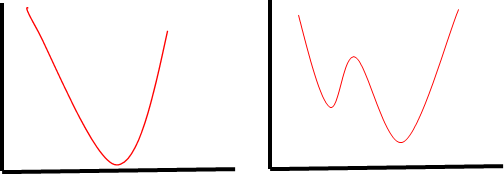





a.  Which of the above figures represents the convex objective function and why? (**1 marks**)

b.  Which hyper-parameter can help to reach the convergence point and the impact of value selection? (**2 marks**)

c.  How can we find the global minima for the objective function shown in Figure-b? _[N.B. Conceptual description will be accepted.]_ (**3 marks**)

#answers

A. The figure (a) represents the convex objective function because the region above its graph is a convey set which means  given any two points, it contains the whole line segment that joins them.

B. To set hyperparameters for strongly convex optimization, we need to know the strong convexity constant µ and the Lipschitz constant L.For convex optimzation, we can find the best setting of hyperparameters that makes the algorithm converge for any strongly convex, Lipschitz continuous function with that µ and L.

C. There is no known algorithm that is guaranteed to find the global minimum of an arbitrary function. There are some ways to find global optimum solution in the non convex problems if it satisfies some conditions that the duality gap equals to zero for the dual problem such as time sharing condition.